## Perceptron - Funções de Custo

Fonte base: https://github.com/fboldt/aulasann/blob/main/perceptron.ipynb

In [1]:
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = geradataset(20)
X, y

(array([[0.50652298, 0.9537305 ],
        [0.44872028, 0.67496988],
        [0.47326918, 0.13294945],
        [0.97306118, 0.8502517 ],
        [0.04122962, 0.99157663],
        [0.27223159, 0.98405334],
        [0.53814016, 0.33401104],
        [0.91379538, 0.16008779],
        [0.36206739, 0.47648699],
        [0.88850218, 0.50533149],
        [0.80651319, 0.07769451],
        [0.74171068, 0.99093305],
        [0.01259413, 0.13083083],
        [0.90424533, 0.99009164],
        [0.45729612, 0.5397264 ],
        [0.23068699, 0.51130182],
        [0.61352797, 0.87060419],
        [0.5790606 , 0.99324414],
        [0.1349125 , 0.13481709],
        [0.88542958, 0.45885006]]),
 array([-1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
        -1,  1,  1]))

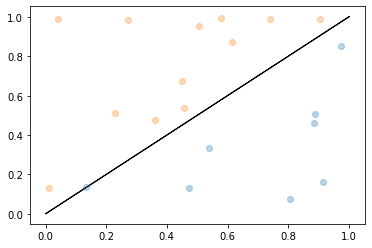

In [2]:
import matplotlib.pyplot as plt

def plotadataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotadataset(X, y)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

vetor = [1, -1]

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp

hiperplano = perpendicular(vetor)

plotavetor(hiperplano)

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100
        self.custo = custo

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
            if custo==0:
                break
    
    def preactivate(self, X):
        return np.matmul(X, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

26.915993445848773
43.31245817212882
28.26545231912152
31.94536806870914
27.851676840742478
28.433614302665728
27.219474947383453
27.22525819111821
26.844644862872276
26.796579553911055
26.67612901113571
26.650777015955942
26.616189769285533
26.609825244077662
26.60397186567063
26.606396612545044
26.609478708370695
26.61461554956055
26.619665686597347
26.624830571628486
26.629531920704846
26.63381433548055
26.63755998397967
26.640817456541274
26.64360130967531
26.645967378525196
26.647960954579908
26.649633752050498
26.65103066039704
26.652193815636412
26.6531595733238
26.65395985976195
26.654621848411253
26.655168715189294
26.655619964629405
26.65599198509674
26.656298458365942
26.656550783383558
26.656758424510695
26.656929226664094
26.657069679425344
26.657185144592766
26.657280046728246
26.65735803384396
26.657422111336526
26.65747475372785
26.657517997397697
26.657553517491646
26.657582691534955
26.657606652004375
26.657626329710247
26.657642489569017
26.657655760075066
26.6576666

#### Função: CustoPerceptron

In [4]:
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

24
48
32
8
0
1.0


#### Função HingeLoss

In [5]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

20
10
4
2
2
2
2
2
0
1.0
